#### Explore sentiment distribution for comments

In [ ]:
# Import libabries
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# Load file
data_comments= pd.read_csv("../data/comments_sentiment_posts_transcripts.csv")

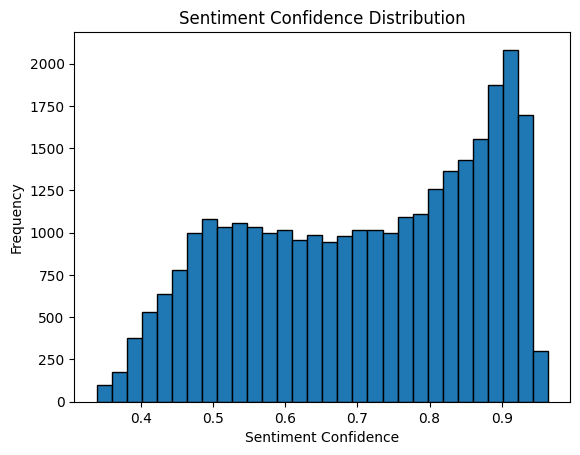

In [4]:
# Visualize sentiment score distribution
data_comments['sentiment_confidence'].plot(kind='hist', bins=30, edgecolor='black', title='Sentiment Confidence Distribution')
plt.xlabel('Sentiment Confidence')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Calculate mean sentiment score
data_comments['sentiment_confidence'].mean()

0.7069605628546315

/var/folders/rx/4hst61c96_bfm0gnxrq_5w_h0000gn/T/ipykernel_22853/2159682334.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_comments_filtered['comment_length'] = data_comments_filtered['comment'].str.len()
/var/folders/rx/4hst61c96_bfm0gnxrq_5w_h0000gn/T/ipykernel_22853/2159682334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_comments_filtered['length_bin'] = pd.cut(data_comments_filtered['comment_length'], bins=20)
/var/folders/rx/4hst61c96_bfm0gnxrq_5w_h0000gn/T/ipykernel_22853/2159682

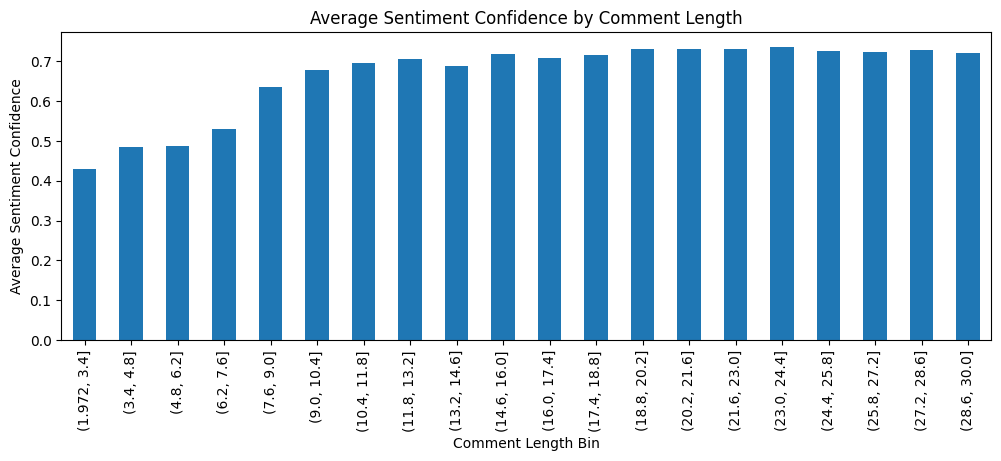

In [6]:
data_comments_filtered = data_comments[data_comments['comment'].str.len() <= 30]

# Ensure comment_length column exists
data_comments_filtered['comment_length'] = data_comments_filtered['comment'].str.len()

# Create bins for lengths
data_comments_filtered['length_bin'] = pd.cut(data_comments_filtered['comment_length'], bins=20)

# Compute average sentiment confidence per bin
binned_avg = data_comments_filtered.groupby('length_bin')['sentiment_confidence'].mean()

# Plot
binned_avg.plot(kind='bar', figsize=(12, 4))
plt.ylabel('Average Sentiment Confidence')
plt.xlabel('Comment Length Bin')
plt.title('Average Sentiment Confidence by Comment Length')
plt.show()


In [8]:
# Total number of comments
total_comments = len(data_comments)

# Number of comments with confidence >= 0.65
kept_comments = (data_comments['sentiment_confidence'] >= 0.65).sum()

# Number of comments you'd lose
lost_comments = total_comments - kept_comments

# Percentage loss
percent_lost = (lost_comments / total_comments) * 100

print(f"Total comments: {total_comments}")
print(f"Kept comments: {kept_comments}")
print(f"Lost comments: {lost_comments} ({percent_lost:.2f}%)")


Total comments: 30454
Kept comments: 18778
Lost comments: 11676 (38.34%)


In [9]:
df_adjusted = data_comments[data_comments['sentiment_confidence'] > 0.65]
df_adjusted['sentiment_confidence'].mean()

0.8194492905205184

In [11]:
pd.set_option('display.max_rows', None)
df_adjusted[['comment', 'sentiment']].sample(n=200, random_state=42)



,comment,sentiment
15602,the dentist is the bane of my existence,negative
23935,Becky is pretty.,positive
3106,She is so rich 💰,positive
4408,"Wir würden uns freuen, eine Zusammenarbeit mit...",positive
29544,you're so pretty..,positive
13537,Love this so much 💛💛,positive
13564,wow the difference !!,positive
25985,even i can't sleep with socks 😭,negative
14054,I really saw the potential,positive
13966,It’s art 😍😍,positive
